In [1]:
# MO444-A 2s/2017 - Second assignment
#
#         Group 05
#
# - Anderson Rossanez (124136)
# - Bruno Branta Lopes (31470)
#

from __future__ import print_function
from scipy import misc
import glob
import numpy as np
from math import sqrt
from skimage.io import imread
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Some definitions
classes = np.asarray(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

def load_image_dataset(name, n):
    images = []
    with open('cifar-10/%s/labels' % name) as labels:
        i = 0
        for path in sorted(glob.glob('cifar-10/%s/*.png' % name)):
            # Reading the images as grayscale to have a 32x32 matrix,
            # instead of a 32x32x3 matrix in case of RGB.
            images.append((imread(path, as_grey=True), labels.next()))
            i += 1
            if i >= n:
                break
    return images

def load_dataset(name):
    dataset = load_image_dataset(name=name, n = 50000)
    
    data_X = [i[0] for i in dataset]
    data_Y = [int(i[1]) for i in dataset]
    
    return np.array(data_X), np.array(data_Y)

In [2]:
# Load train dataset
data_X, data_Y = load_dataset('train')

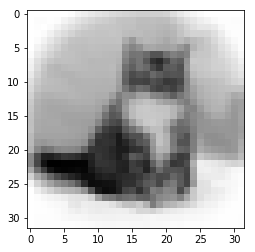

Label: 3


In [3]:
# Take a look at a sample and its class (207 should be a cat [3])
plt.imshow(data_X[207], cmap='gray')
plt.show()

print('Label: %s' % data_Y[207])

In [4]:
# Flatten data to 1-D
def flatten_data(data):
    reshaped = data.reshape(-1, 32*32)
    return reshaped

print('Previous shape: {}'.format(data_X.shape))

data_X = flatten_data(data_X)

print('Flattened shape: {}'.format(data_X.shape))

Previous shape: (50000, 32, 32)
Flattened shape: (50000, 1024)


In [66]:
# Implementing K-Fold to help avoiding overfitting
from sklearn.model_selection import KFold
from datetime import datetime

random_state = np.random.RandomState(1)

# prepare for 5-fold execution
k5_fold = KFold(n_splits=5, shuffle=True, random_state=random_state)

def run_kfold(method, data_Y, data_X, ova=False, num_classes=0):
    train_precision, train_recall, train_f1 = [], [], []
    validation_precision, validation_recall, validation_f1 = [], [], []
    start_time = datetime.now()
    k = 0
    print('k', end=' ')
    model = None
    classifiers = []

    if ova:
        classifiers = [method] * num_classes

    for train_index, validation_index in k5_fold.split(data_X):
        k += 1
        print(k, end=' ')
        
        train_data_X, train_data_Y = data_X[train_index], data_Y[train_index]
        validation_data_X, validation_data_Y = data_X[validation_index], data_Y[validation_index]

        # Train the model(s) using the data
        if ova:
            for i in range(num_classes):
                train_data_Y_i = np.array([1 if j == i else 0 for j in train_data_Y])
                classifiers[i] = classifiers[i](train_data_X, train_data_Y_i)
        else:
            model = method(train_data_X, train_data_Y)
        
        if ova:
            train_prediction = np.zeros(shape=(num_classes, len(train_data_Y)))
            val_prediction = np.zeros(shape=(num_classes, len(validation_data_Y)))
            for i in range(num_classes):
                pred_train_i = classifiers[i].predict(train_data_X)
                pred_val_i = classifiers[i].predict(validation_data_X)
                
                # TODO do something to combine the classifiers results

            predicted_train_data_Y = # Add them together somehow
            predicted_validation_data_Y = # Add them together somehow
        else:
            predicted_train_data_Y = model.predict(train_data_X)
            predicted_validation_data_Y = model.predict(validation_data_X)

        validation_precision.append(precision_score(validation_data_Y, predicted_validation_data_Y))
        validation_recall.append(recall_score(validation_data_Y, predicted_validation_data_Y))
        validation_f1.append(f1_score(validation_data_Y, predicted_validation_data_Y))
    print('time elapsed: {}\n'.format(datetime.now() - start_time))
    print('             Precision  Recall  F1 Score')
    print('Training:      %5.2f    %5.2f   %5.2f' % (np.mean(train_precision), np.mean(train_recall), np.mean(train_f1)))
    print('Validation:    %5.2f    %5.2f   %5.2f' % (np.mean(validation_precision), np.mean(validation_recall), np.mean(validation_f1)))
    return model

In [67]:
# Create a baseline One-vs-All logistic regression model
run_kfold(lambda X, Y: SGDClassifier(loss='log', n_iter=5, eta0=0.01, random_state=random_state).fit(X, Y), data_Y, data_X, ova=True, num_classes=len(classes))

k 1 [0 0 0 ..., 0 0 0]
[1 1 0 ..., 1 1 0]
[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]


ValueError: Target is multiclass but average='binary'. Please choose another average setting.